<h1 id='parte-3'>5. Introdução ao Web Crawling - Selenium básico</h1>

<p>Com Web Scraping aprendemos formas de extrair e coletar informações da web por meio de um request na página desejada, através do método GET. Mas vimos que existem limitações nesse tipo de processo, como interagir com partes da página e com scripts. Para resolver isso podemos usar o Web Crawling e suas ferramentas. A mais importante das ferramentas, o Selenium, irá servir para interagirmos com a página de forma dinâmica.</p>

<h2 id='parte-3a' style="color:blue;">a. Selenium e suas funcionalidades</h2>

<p>O Selenium é uma ferramenta desenvolvida em Java capaz de 'emular' um navegador através de um driver. De forma programática(por código), poderemos interagir com a página, seja clicando um botão, preenchendo um formulário ou acionando um <b>script</b> ou <b>iframe</b>.</p>

<p>_______________________________________________________________________________________________________________________</p>

<h3 id='parte-1a1' style="color:green;">a.1. Encontrando o XPath</h3>

<p>Além de procurar elementos pela tag ou por algum atributo(class, id, etc...), também temos uma outra opção no Selenium. Não conseguimos usá-lo no <b>bs4</b> por alguma escolha dos desenvolvedores da biblioteca. Seu uso no Selenium, porém, torna muitas vezes o trabalho mais fácil.</p>

<p>Para achar o <b>XPath</b>, basta inspecionar o que queremos encontrar na página, clicar com o mouse direito no código fonte desejado, selecionar <b>Copy</b> e em seguida <b>Copy XPath</b>. Voltando ao nosso exemplo do começo com <b>exemplo2.html</b>:</p>

<img src="./imagens/xpath-titulo.png" />

<p><b>XPath</b> selecionado da imagem: <b style="color:blue;">/html/body/div[1]</b></p>

<p>O XPath copiado na imagem indica que nosso elemento está no primeiro <b>&lt;div&gt;...&lt;/div&gt; (div[1])</b>, dentro de  <b>&lt;html&gt;&lt;body&gt;...&lt;/body&gt;&lt;/html&gt; (/html/body/)</b>. Caso queiramos extrair o XPath do título com <b>id='titulo-1'</b>, poderemos ver que o caminho será muito mais simples, já que o id é único no código:</p>

<p><b>XPath</b> selecionado do título: <b style="color:blue;">//*[@id="titulo-1"]</b></p>

<p>Pegando o <b>XPath</b> de <b>&lt;ul&gt;...&lt;/ul&gt;</b> dentro do segundo <b>&lt;div&gt;...&lt;/div&gt;</b>, teremos o caminho até ele, assim como no primeiro exemplo:</p>

<p><b>XPath</b> selecionando a lista: <b style="color:blue;">/html/body/div[2]/ul</b></p>

<p>_______________________________________________________________________________________________________________________</p>

<h3 id='parte-1a1' style="color:green;">a.2. Webdriver</h3>

<p>Para ter acesso ao navegador, precisamos rodar o <b>Webdriver</b> do <b>Selenium</b>. Devemos primeiro baixar o driver de um navegador nos seguintes links:</p>

<ul>
    <li>Chrome: <a href='https://sites.google.com/a/chromium.org/chromedriver/downloads'>https://sites.google.com/a/chromium.org/chromedriver/downloads</a></li>
    <li>Firefox: <a href='https://github.com/mozilla/geckodriver/releases'>https://github.com/mozilla/geckodriver/releases</a></li>
</ul>

<p>Para usar o <b>Webdriver</b>, devemos importar e chamar os seguintes métodos, com os respectivos endereços para o driver baixado como argumento:</p>

In [1]:
from selenium import webdriver

<ul>
    <li><b style="color:red;">driver</b> = webdriver.Chrome(<b style="color:brown;">'path para o driver'</b>)</li>
    <li><b style="color:red;">driver</b> = webdriver.Firefox(<b style="color:brown;">'path para o driver'</b>)</li>
</ul>

<p>Podemos ainda usar um método <b>Options()</b> e depois adicionar argumentos a ele, para definir certos parâmetros que queremos ter no navegador. Mais a frente serão mostrados exemplos:</p>

In [2]:
from selenium.webdriver.chrome.options import Options  

<ol>
    <li><b style="color:blue;">opt</b> = Options()</li>
    <li><b style="color:blue;">opt</b>.add_argument(...) </li>
    <li><b style="color:red;">driver</b> = webdriver.Chrome(<b style="color:brown;">'path'</b>, options=<b style="color:blue;">opt</b>)</li>
</ol>

<p>Algumas funcionalidades de <b style="color:red;">driver</b>:</p>

<ul>
    <li>Pegar o código fonte: <b style="color:red;">driver</b>.source_code()</li>
    <li>Maximizar o navegador: <b style="color:red;">driver</b>.fullscreen_window()</li>
    <li>Recarregar a página: <b style="color:red;">driver</b>.refresh()</li>
    <li>Voltar uma página: <b style="color:red;">driver</b>.back()</li>
    <li>Avançar uma página: <b style="color:red;">driver</b>.forward()</li>
    <li>Encerrar o driver: <b style="color:red;">driver</b>.close()</li>
</ul>

<p>Outras funcionalidades de <b style="color:red;">driver</b> são explicadas durante os exemplos dos capítulos seguintes.</p>

<p>_______________________________________________________________________________________________________________________</p>

<h3 id='parte-1a1' style="color:green;">a.3. Buscando elementos</h3>

<p>Temos diversas formas de procurar um elemento da página dentro do <b>Selenium</b>. Alguns dos métodos usados:</p>

<ul>
    <li>Pelo XPath: <b style="color:blue;">elemento</b> = <b style="color:red;">driver</b>.find_element_by_xpath(...)</li>
    <li>Pelo id: <b style="color:blue;">elemento</b> = <b style="color:red;">driver</b>.find_element_by_id(...)</li>
    <li>Pelo name:<b style="color:blue;">elemento</b> = <b style="color:red;">driver</b>.find_element_by_name(...)</li>
    <li>Pelo class: <b style="color:blue;">elemento</b> = <b style="color:red;">driver</b>.find_element_by_class_name(...)</li>
    <li>Pela tag: <b style="color:blue;">elemento</b> = <b style="color:red;">driver</b>.find_element_by_tag_name(...)</li>
</ul>

<p>Caso queiramos procurar por vários elementos, apenas colocamos <b>element</b> no plural dentro do método(<b>elements</b>).</p>

<p>Ainda podemos selecionar elementos como <b>&lt;select&gt;...&lt;/select&gt;</b> ou <b>&lt;iframe&gt;...&lt;/iframe&gt;</b> usando métodos como <b>Select()</b> e <b>switch_to.frame</b>, que serão explicados melhor com exemplos nos capítulos seguintes.</p> 

<p>_______________________________________________________________________________________________________________________</p>

<h3 id='parte-1a1' style="color:green;">a.4. Interagindo com os elementos</h3>

<p>Podemos fazer diversas interações com o elemento selecionado, seja preenchendo um campo ou apertando um botão. Segue alguns exemplos de métodos:</p>

In [3]:
from selenium.webdriver.common.keys import Keys

<ul>
    <li>Clicar: <b style="color:blue;">elemento</b>.click()</li>
    <li>Limpar um campo: <b style="color:blue;">elemento</b>.clear()</li>
    <li>Preencher um campo: <b style="color:blue;">elemento</b>.send_keys(<b style="color:brown;">'string'</b>)</li>
    <li>Apertar 'enter': <b style="color:blue;">elemento</b>.send_keys(<b style="color:green;">Keys.ENTER</b>)</li>
    <li>Extrair texto: <b style="color:blue;">elemento</b>.text()</li>
</ul>

<p>Dentro de <b>.send_keys()</b>, além de uma string, podemos usar diversas <b style="color:green;">Keys.</b>(teclas) do teclado(setas, espaço, etc...) como parâmetro:</p>

<ul>
    <li>enter: <b style="color:green;">Keys.ENTER</b>
    <li>seta para cima: <b style="color:green;">Keys.ARROU_UP</b>
    <li>alt: <b style="color:green;">Keys.ALT</b>
    <li>espaço: <b style="color:green;">Keys.SPACE</b>
</ul>

<p>_______________________________________________________________________________________________________________________</p>
<p>_______________________________________________________________________________________________________________________</p>

<h2 id='parte-3a' style="color:blue;">b. Extraindo uma lista de links do google com Selenium e bs4</h2>

<p>Como primeiro exemplo, faremos o mesmo processo da seção <b style="color:blue;">4.a</b>, em que pegamos os links de uma busca no google.</p>

<p>_______________________________________________________________________________________________________________________</p>

<h3 id='parte-1a1' style="color:green;">b.1. Importando as bibliotecas e lendo o driver</h3>

<p>Iremos utilizar o driver do Chrome, que pode ser baixado <a href='https://sites.google.com/a/chromium.org/chromedriver/downloads'>aqui</a>.</p>

<ul><li>Importando as bibliotecas necessárias:</ul></li>

In [4]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options  

from bs4 import BeautifulSoup

<ul><li>Lendo o driver:</ul></li>

In [6]:
opt = Options()  
opt.add_argument("--headless") 

driver = webdriver.Chrome('./driver/chromedriver.exe', options=opt)

<p>Colocamos como opção o argumento <b>"--headless"</b>, isso significa que o nosso navegador não irá abrir 'visualmente', mas estará rodando por 'baixo'. Isso é interessante quando, por exemplo, queremos fazer um Web Scraping na página e não precisamos ver o que está acontecendo nela.</p>

<p>_______________________________________________________________________________________________________________________</p>

<h3 id='parte-1a1' style="color:green;">b.2. Acessando a página e extraindo o código fonte.</h3>

<p>Iremos acessar a página de pesquisa do google de notícias do <b>InfoMoney</b> através de uma busca do google na área <b>news</b>, usando como filtros o assunto <b>'itaú'</b> e um intervalo de tempo <b>[01/09/2019, 01/11/2019]</b>:</p>

<ul><li><b>url</b> = <b style="color:blue;">https://www.google.com.br/search?q=<b style="color:red;">%22ita%C3%BA%22+infomoney</b>&tbs=cdr:1,<b style="color:red;">cd_min:9/1/2019,cd_max:11/1/2019</b>&tbm=nws&ei=aj_YXeiwGcbZ5gLut4noDw&<b style="color:red;">start=0</b>&sa=N&ved=0ahUKEwjojZbtzv7lAhXGrFkKHe5bAv0Q8tMDCFM&biw=1920&bih=944&dpr=1</b></li></ul>

<p>Agora precisamos acessar a url pelo Selenium usando o método <b>'.get()'</b>:</p>

In [7]:
url = 'https://www.google.com.br/search?q=%22ita%C3%BA%22+infomoney&tbs=cdr:1,cd_min:9/1/2019,cd_max:11/1/2019&tbm=nws&ei=aj_YXeiwGcbZ5gLut4noDw&start=0&sa=N&ved=0ahUKEwjojZbtzv7lAhXGrFkKHe5bAv0Q8tMDCFM&biw=1920&bih=944&dpr=1'
driver.get(url)

<p>Em seguida, utilizando o método <b>'.page_source'</b>, conseguimos extrair o código fonte da página, para assim usarmos o <b>BeautifulSoup</b> para extrairmos o que desejamos.</p>

In [8]:
html_text = driver.page_source

driver.close()

[<div class="bkWMgd"><!--m--><div class="g"><div class="ts Pg8zWb hqn4Zb C1Iii FddHQd tsUanb"><a class="top NQHJEb dfhHve" href="https://www.infomoney.com.br/negocios/cade-investiga-itau-e-rede-por-pratica-anticompetitiva-no-mercado-de-meios-de-pagamento/" onmousedown="return rwt(this,'','','','1','AOvVaw3pmw5Aya3qncNQqpcYCFX5','','0ahUKEwjHsZ-C3cnmAhWGJLkGHXoVBQ0QvIgBCCYwAA','','',event)"><img alt='Imagem da história para "itaú" infomoney de InfoMoney' class="th BbeB2d" data-atf="1" data-iml="1577033881343" onload="typeof google==='object'&amp;&amp;google.aft&amp;&amp;google.aft(this)" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQC_Q_g1z-p8BafqmPvodJ4R9BLXFi4jDfK5Xcp3-NJXrfo6HhBV-PpCPLJNvDHOm0kd5OX2tc&amp;s"/></a><div class="gG0TJc"><h3 class="r dO0Ag"><a class="l lLrAF" href="https://www.infomoney.com.br/negocios/cade-investiga-itau-e-rede-por-pratica-anticompetitiva-no-mercado-de-meios-de-pagamento/" onmousedown="return rwt(this,'','','','1','AOvVaw3pmw5Aya3qncNQqpcYC
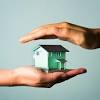
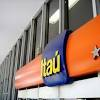
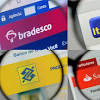
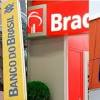
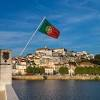
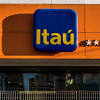
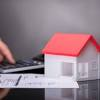

In [9]:
html = BeautifulSoup(html_text, "html.parser")

div_search = html.find_all('div', attrs={'class':'bkWMgd'})

div_search

<p>Veja que agora nossa busca por um <b>&lt;div&gt;...&lt;/div&gt;</b> com <b>'class=bkWMgd'</b> retornou o que queriamos, pois o script foi acionado pelo driver do Chrome logo após entrarmos na página. Fazendo uma nova busca pelos <b>&lt;a&gt;...&lt;/a&gt;</b> em <b>'div_search'</b>, conseguiremos extrair os links:</p>

[<a class="top NQHJEb dfhHve" href="https://www.infomoney.com.br/negocios/cade-investiga-itau-e-rede-por-pratica-anticompetitiva-no-mercado-de-meios-de-pagamento/" onmousedown="return rwt(this,'','','','1','AOvVaw3pmw5Aya3qncNQqpcYCFX5','','0ahUKEwjHsZ-C3cnmAhWGJLkGHXoVBQ0QvIgBCCYwAA','','',event)"><img alt='Imagem da história para "itaú" infomoney de InfoMoney' class="th BbeB2d" data-atf="1" data-iml="1577033881343" onload="typeof google==='object'&amp;&amp;google.aft&amp;&amp;google.aft(this)" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQC_Q_g1z-p8BafqmPvodJ4R9BLXFi4jDfK5Xcp3-NJXrfo6HhBV-PpCPLJNvDHOm0kd5OX2tc&amp;s"/></a>,
 <a class="l lLrAF" href="https://www.infomoney.com.br/negocios/cade-investiga-itau-e-rede-por-pratica-anticompetitiva-no-mercado-de-meios-de-pagamento/" onmousedown="return rwt(this,'','','','1','AOvVaw3pmw5Aya3qncNQqpcYCFX5','','0ahUKEwjHsZ-C3cnmAhWGJLkGHXoVBQ0QqQIIJygAMAA','','',event)">Cade investiga <em>Itaú</em> e Rede por prática anticompetiti
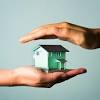
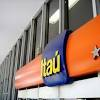
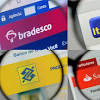
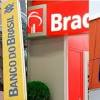
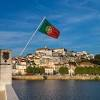
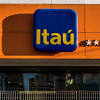
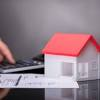

In [10]:
a_search = div_search[0].find_all('a')

a_search

<p>Extraindo os <b>href</b> e eliminado links duplicados:</p>

In [11]:
links = []

for a in a_search:
    link = a.get('href')
    links.append(link)
    
links = list(set(links))

links

['https://www.infomoney.com.br/mercados/itau-conclui-compra-de-fatia-da-ticket-apos-aprovacao-do-bc-e-cade-petrobras-e-mais-noticias/',
 'https://www.infomoney.com.br/minhas-financas/financiamento-imobiliario-as-taxas-de-juros-praticadas-pelos-bancos-no-brasil/',
 'https://www.infomoney.com.br/consumo/bancos-vao-dar-taxas-reduzidas-no-credito-na-semana-do-brasil/',
 'https://www.infomoney.com.br/negocios/cade-investiga-itau-e-rede-por-pratica-anticompetitiva-no-mercado-de-meios-de-pagamento/',
 'https://www.infomoney.com.br/onde-investir/itau-e-bradesco-avaliam-abrir-gestora-de-fortunas-em-portugal/',
 'https://www.infomoney.com.br/negocios/itau-adesao-ao-pdv-que-tem-7-mil-elegiveis-esta-acima-do-esperado/',
 'https://www.infomoney.com.br/minhas-financas/bancos-disputam-credito-imobiliario-com-guerra-de-taxas-de-juros/',
 'https://www.infomoney.com.br/mercados/itau-unibanco-e-bank-of-america-fecham-acordo-com-cvm-para-evitar-processo/',
 'https://www.infomoney.com.br/mercados/acoes-de-

<p>Com menos esforço, conseguimos extrair todos os links de uma busca no google, apenas ativando o script que antes não era possível ativar. Se quisermos extrair links de <b>n = 4</b> páginas, podemos usar o código a seguir. No final do processo não podemos esquecer de usar <b>driver.close()</b> para encerrar o processo e fechar o driver.</p>

In [12]:
# Iniciando o driver
options = Options()  
options.add_argument("--headless") 
driver = webdriver.Chrome('./driver/chromedriver.exe', options=options)

# Parâmetros da nossa busca
pag = [0, 10, 20, 30]
busca = '%22ita%C3%BA%22+infomoney'
per = 'cd_min:9/1/2019,cd_max:11/1/2019'

# Vetor para armazenar os links do InfoMoney
links = []

# Loop entre as páginas de 1 a 4
for n in pag:
    # Acessando a página pelo navegador
    url = f'https://www.google.com.br/search?q={busca}&tbs=cdr:1,{per}&tbm=nws&ei=aj_YXeiwGcbZ5gLut4noDw&start={n}&sa=N&ved=0ahUKEwjojZbtzv7lAhXGrFkKHe5bAv0Q8tMDCFM&biw=1920&bih=944&dpr=1'
    driver.get(url)
    
    # Extraindo o código fonte da página
    html_text = driver.page_source
    
    # HTML organizado pelo bs4
    html = BeautifulSoup(html_text, "html.parser")
    
    # Extração de todos os <a>...</a> no <div>...</div> do resultado da busca
    div_search = html.find_all('div', attrs={'class':'bkWMgd'})
    a_search = div_search[0].find_all('a')
    
    # Retirando os 'href'
    for a in a_search:
        link = a.get('href')
        # Verificando se o link é do InfoMoney
        if 'www.infomoney.com.br' in link:
            links.append(link)

# Encerrando o driver
driver.close()

# Retirando links duplicados
links = list(set(links))
    
links

['https://www.infomoney.com.br/minhas-financas/financiamento-imobiliario-as-taxas-de-juros-praticadas-pelos-bancos-no-brasil/',
 'https://www.infomoney.com.br/carreira/itau-e-jpmorgan-buscam-talentos-em-bonds-para-rali-da-america-latina/',
 'https://www.infomoney.com.br/mercados/construcao-pode-ser-chave-para-economia-deslanchar-diz-economista-chefe-do-itau/',
 'https://www.infomoney.com.br/mercados/e-se-tivermos-mesmo-uma-recessao-global-estas-sao-as-5-acoes-para-comprar-segundo-o-itau-bba/',
 'https://www.infomoney.com.br/consumo/bancos-vao-dar-taxas-reduzidas-no-credito-na-semana-do-brasil/',
 'https://www.infomoney.com.br/mercados/bancos-brasileiros-nunca-foram-tao-bons-pagadores-de-dividendos-como-agora-destaca-credit-suisse/',
 'https://www.infomoney.com.br/mercados/itau-unibanco-e-bank-of-america-fecham-acordo-com-cvm-para-evitar-processo/',
 'https://www.infomoney.com.br/mercados/reacao-exagerada-ou-justificada-analistas-se-dividem-sobre-impacto-das-fintechs-para-as-acoes-dos-b

<p>O tempo de processamento obviamente é um pouco mais lento do que fazendo <b>requests</b>, mas o Selenium nos permite acessar partes de uma página que apenas com uma requisição não seria suficiente.</p>

<p>_______________________________________________________________________________________________________________________</p>
<p>_______________________________________________________________________________________________________________________</p>